In [56]:
import pandas as pd
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from sklearn.metrics import mean_squared_error as mse

In [58]:
df = pd.read_csv('monthly-traffic-fatalities-in-on.csv')
df[['Month','fatalities']] = df['Month;fatalities'].str.split(';',expand = True)
df

,Month;fatalities,Month,fatalities
0,1960-01;61,1960-01,61
1,1960-02;65,1960-02,65
2,1960-03;55,1960-03,55
3,1960-04;56,1960-04,56
4,1960-05;91,1960-05,91
...,...,...,...
175,1974-08;214,1974-08,214
176,1974-09;173,1974-09,173
177,1974-10;170,1974-10,170
178,1974-11;175,1974-11,175


In [60]:
df.drop('Month;fatalities' , inplace = True , axis = 1)

In [62]:
y = df['fatalities'].astype(int)

In [64]:
y_train = y.iloc[:-12]
y_test = y.iloc[-12:]

## Arima 

In [67]:
model = auto_arima(y_train,trace=True , error_action='ignore', suppress_warnings=True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1585.839, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1586.576, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1587.171, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1587.504, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1584.643, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1587.437, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.344 seconds


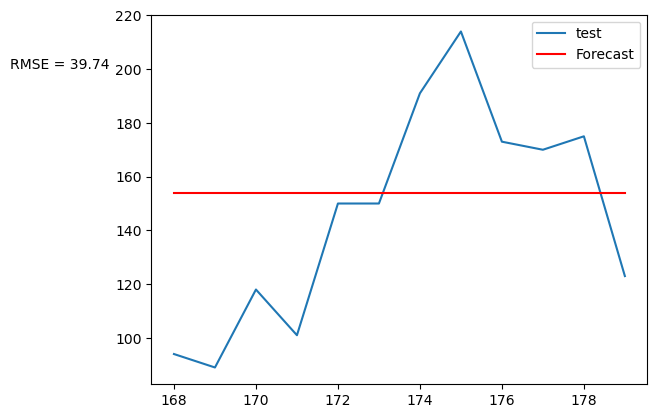

In [73]:
# model = ARIMA(y_train, order=(0,1,0))
import matplotlib.pyplot as plt
forecast = model.predict(n_periods = len(y_test))
y_test.plot(label='test')
forecast.plot(color='red',label='Forecast')
rmse = np.sqrt(mse(y_test,forecast))
plt.text(164,200,"RMSE = "+ str(np.round(rmse,2)))
plt.legend(loc='best')
plt.show()


## Sarimax

In [76]:
sar_model = auto_arima(y_train , trace = True , error_action='ignore' , suppress_warnings=True , seasonal=True,m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1586.576, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1529.884, Time=0.11 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1557.310, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1584.643, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1587.171, Time=0.03 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=1516.360, Time=0.27 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=1542.216, Time=0.16 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=1513.576, Time=0.35 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=1529.581, Time=0.14 sec
 ARIMA(2,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.04 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=1492.844, Time=0.26 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : 

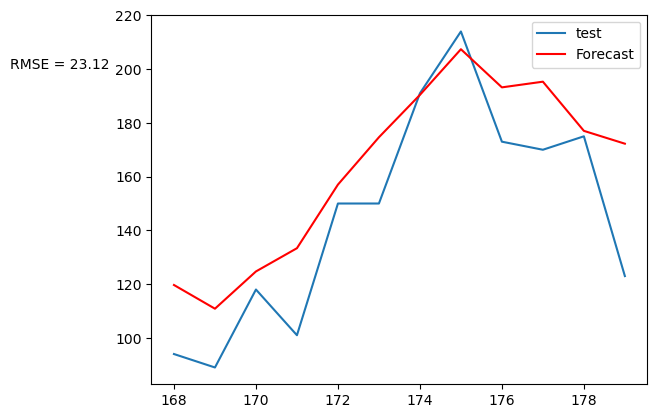

In [78]:
forecast = sar_model.predict(n_periods = len(y_test))
y_test.plot(label='test')
forecast.plot(color='red',label='Forecast')
rmse = np.sqrt(mse(y_test,forecast))
plt.text(164,200,"RMSE = "+ str(np.round(rmse,2)))
plt.legend(loc='best')
plt.show()

In [ ]:
# Holt Winter Additive 
from statsmodels.tsa.api import Holt , ExponentialSmoothing

